# 3.7 Comparando as performances

**Objetivo:** Compare o tempo de execução de três algoritmos diferentes de otimização
(busca aleatória, busca em grade e algoritmos genéticos) para resolver o problema das
caixas binárias. Para este exercício, considere como critério de parada para o algoritmo
genético e para a busca aleatória o ato de encontrar a resposta do problema. Mantenha
o algoritmo de busca em grade com o critério de parada visto na disciplina (isto é, testar
todas as possibilidades).

**Lembrete:** nós estudamos como medir o tempo de execução de algoritmos na disciplina Lógica Computacional.
**Dica:** O enunciado do objetivo não definiu o número de caixas. É esperado de um
cientista que ele entenda que não adianta resolver esse problema para apenas um valor
de n caixas, mas sim buscar uma tendência resolvendo esse problema para alguns valores
de n diferentes em busca de encontrar um padrão. Considere pelo menos 10 valores de n
diferentes na sua resolução.
**Dica 2:** É esperado que um cientista entenda que medir o tempo de execução exige
rodar a mesma busca algumas vezes a fim de computar alguma estatística, como a média
dos tempos, por exemplo.

### 1.Resolução:

Precisamos rodar os códigos de busca aleatória, busca em grade e algoritmos genéticos para computar a performance entre eles verificando qual o tempo que levam para processar. Uma vez que o problema abordado é o das caixas binárias, podemos utilizar os códigos fornecidos em aula. Para computar o tempo, foi feito o import do módulo `time`. Como informado no enunciado, para computar uma métrica de performance precisamos rodar o código para diversos números de caixas e comparar entre os algoritmos utilizando uma métrica, que aqui seria a média dos tempos.

In [34]:
import time 

### 1.1 Busca aleatória

Foi implementada conforme [1]. Foi adicionado um dicionário `dict_aleatorio` para armazenar o tempo correspondente a cada quantidade específica de caixas. Estamos armazenando a média dos tempos de execução para cada número de caixas. 

In [35]:
import random

def funcao_objetivo_cb(candidato):
    return sum(candidato)

def gene_cb():
    valores_possiveis = [0, 1]
    gene = random.choice(valores_possiveis)
    return gene

def cria_candidato_cb(n):
    candidato = []
    for _ in range(n):
        gene = gene_cb()
        candidato.append(gene)
    return candidato

In [36]:
TESTE_CAIXAS = list(range(1, 21))
NUMERO_TESTES = 20

NUM_CAIXAS = list(range(3, 20))

In [37]:
dict_aleatorio = {}

for j in NUM_CAIXAS:
    tempos_aleatorio = []
    for _ in range(NUMERO_TESTES):

        inicio_aleatorio = time.time()

        NUM_SORTEIOS = 1000

        caixas = []

        for i in range(NUM_SORTEIOS):
            candidato = cria_candidato_cb(i)
            caixas.append(candidato)

        fim_aleatorio = time.time()

        tempo_execucao_aleatorio = fim_aleatorio - inicio_aleatorio

        tempos_aleatorio.append(tempo_execucao_aleatorio)

    dict_aleatorio[j] = sum(tempos_aleatorio)/NUMERO_TESTES

dict_aleatorio


{3: 0.3217795014381409,
 4: 0.5448027133941651,
 5: 0.6322265625,
 6: 0.3437202453613281,
 7: 0.3120391726493835,
 8: 0.3227123975753784,
 9: 0.7321093559265137,
 10: 0.5605387687683105,
 11: 0.3410807609558105,
 12: 0.344547438621521,
 13: 0.3154855489730835,
 14: 0.3222607374191284,
 15: 0.314595365524292,
 16: 0.32201510667800903,
 17: 0.32557867765426635,
 18: 0.3169801592826843,
 19: 0.48828214406967163}

### 1.2 Busca em grade

Implementado conforme [1]. Igualmente, foi adicionado o `dict_grade` para a mesma lógica que no código de busca aleatória. Também retornamos a média para o número de caixas no dicionário.

In [38]:
dict_grade = {}

for j in NUM_CAIXAS:
    tempos_grade = []

    for _ in range(NUMERO_TESTES):

        inicio_grade = time.time()

        from itertools import product

        caixas = []

        for candidato in product([0, 1], repeat=j):
            caixas.append(candidato)

        fim_grade = time.time()

        tempo_execucao_grade = fim_grade - inicio_grade

        tempos_grade.append(tempo_execucao_grade)

    dict_grade[j] = sum(tempos_grade)/NUMERO_TESTES

In [39]:
dict_grade

{3: 0.00034097433090209963,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 4.634857177734375e-05,
 8: 0.0,
 9: 0.00010908842086791992,
 10: 0.00015827417373657227,
 11: 0.00027643442153930665,
 12: 0.0010208606719970704,
 13: 0.0028054118156433105,
 14: 0.004497253894805908,
 15: 0.010168766975402832,
 16: 0.018775796890258788,
 17: 0.040216255187988284,
 18: 0.09084963798522949,
 19: 0.1959259867668152}

### 1.3 Algoritmos genéticos

Implementado conforme [1]. Também foi adicionada de um dicionário para guardar as médias dos tempos para cada número de caixas.

In [40]:
from funcoes_6 import funcao_objetivo_pop_cb as funcao_objetivo
from funcoes_6 import populacao_cb as cria_populacao
from funcoes_6 import selecao_roleta_max as funcao_selecao
from funcoes_6 import cruzamento_ponto_simples as funcao_cruzamento
from funcoes_6 import mutacao_simples_cb as funcao_mutacao
from pprint import pprint
import random

In [41]:
TAMANHO_POPULACAO = 10
NUM_GERACOES = 50
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05

In [42]:
dict_genetico = {}

for j in NUM_CAIXAS:
    populacao = cria_populacao(TAMANHO_POPULACAO, j)
    tempos_genetico = []

    for _ in range(NUMERO_TESTES):

        inicio_genetico = time.time()

        hall_da_fama = []

        for n in range(NUM_GERACOES):
            # Seleção
            fitness = funcao_objetivo(populacao)        
            selecionados = funcao_selecao(populacao, fitness)
            
            # Cruzamento
            proxima_geracao = []
            for pai, mae in zip(selecionados[::2], selecionados[1::2]):
                individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
                proxima_geracao.append(individuo1)
                proxima_geracao.append(individuo2)
            
            # Mutação
            funcao_mutacao(proxima_geracao, CHANCE_DE_MUTACAO)
            
            # Atualização do hall da fama
            fitness = funcao_objetivo(proxima_geracao)
                
            maior_fitness = max(fitness)
            indice = fitness.index(maior_fitness)
            hall_da_fama.append(proxima_geracao[indice])    
            
            # Encerramento
            populacao = proxima_geracao


        fitness = funcao_objetivo(hall_da_fama)
        maior_fitness = max(fitness)
        indice = fitness.index(maior_fitness)
        melhor_individuo_observado = hall_da_fama[indice]

        fim_genetico = time.time()

        tempo_execucao_genetico = fim_genetico - inicio_genetico

        tempos_genetico.append(tempo_execucao_genetico)

    dict_genetico[j] = sum(tempos_genetico)/NUMERO_TESTES

In [43]:
dict_genetico

{3: 0.0008234739303588867,
 4: 0.0012754559516906737,
 5: 0.0007776856422424316,
 6: 0.0012364149093627929,
 7: 0.0012670278549194336,
 8: 0.001243293285369873,
 9: 0.0012414693832397462,
 10: 0.0008510828018188476,
 11: 0.0016457915306091308,
 12: 0.0008020401000976562,
 13: 0.0012362122535705567,
 14: 0.0012428998947143556,
 15: 0.0012575149536132812,
 16: 0.0012562036514282226,
 17: 0.0013338208198547363,
 18: 0.001181483268737793,
 19: 0.0012575268745422363}

Essas então são as médias para cada tipo de algoritmo. 

In [44]:
print(f'Tempo de busca aleatória: {sum(tempos_aleatorio)/NUMERO_TESTES}\nTempo de execução da busca em grade: {sum(tempos_grade)/NUMERO_TESTES}\nTempo de execução algoritmo genético: {sum(tempos_genetico)/NUMERO_TESTES}')

Tempo de busca aleatória: 0.48828214406967163
Tempo de execução da busca em grade: 0.1959259867668152
Tempo de execução algoritmo genético: 0.0012575268745422363


### 1.4 Plot dos resultados

In [45]:
import pandas as pd

tabela = pd.DataFrame({
    "Caixas Binárias": dict_aleatorio.keys(),
    "Busca Aleatória": dict_aleatorio.values(),
    "Busca em Grade": dict_grade.values(),
    "Algoritmo Genético": dict_genetico.values()
})

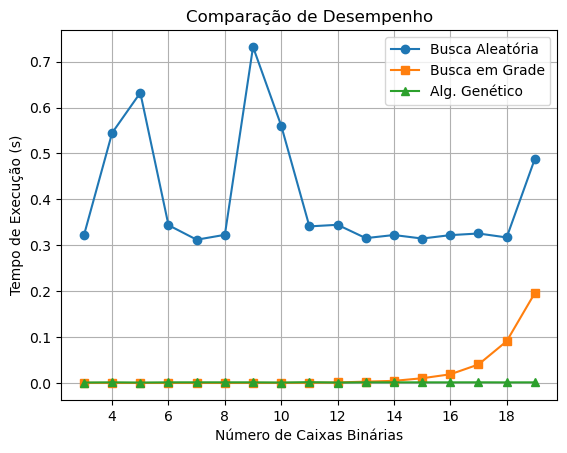

In [46]:
import matplotlib.pyplot as plt

x = list(dict_aleatorio.keys())
y_aleatorio = list(dict_aleatorio.values())
y_grade = list(dict_grade.values())
y_genetico = list(dict_genetico.values())

plt.plot(x, y_aleatorio, label="Busca Aleatória", marker='o')
plt.plot(x, y_grade, label="Busca em Grade", marker='s')
plt.plot(x, y_genetico, label="Alg. Genético", marker='^')

plt.xlabel("Número de Caixas Binárias")
plt.ylabel("Tempo de Execução (s)")
plt.title("Comparação de Desempenho")
plt.legend()
plt.grid(True)

plt.show()

#### 2. Conclusão

Podemos verificar pelo gráfico que os valores para algoritmos se mantém bem constantes em relação aos de busca aleatória e os de busca em grade. Mas esse resultado era relativamente esperado, uma vez que a busca em grade varre todas as possibilidades possíveis para configurações de caixas, ela é bastante custosa e isso tende a piorar à medida que aumentamos o números de caixa. A busca aleatória não apresenta muita constância em relação ao seu tempo, pois o formato da curva variou bastante enquanto testava. E isso também é esperado, porque funciona de uma forma aleatória.

### 3. Referências

[1].CASSAR, Daniel. [Material de sala de aula]. Redes Neurais e Algoritmos Genéticos, 2025, Ilum - Escola de Ciência.